In [3]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt

# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"


# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Import CSV file into Data Frame
popular_tweeters = pd.read_csv("PopularAcounts.csv", dtype=str)

# Iterate through DataFrame
for index, row in popular_tweeters.iterrows():

    # Grab the username
    target_user = row["Screen Name"]
    # print(target_user)
    
    # Use the username with the Twitter API get_user
    user_account = api.get_user(target_user)
    user_real_name = user_account["name"]
    
    # Get the specific column data
    user_tweets = user_account["statuses_count"]
    user_followers = user_account["followers_count"]
    user_following = user_account["friends_count"]
    user_favorites = user_account["favourites_count"]
    
    # Replace the row information for each
    popular_tweeters.set_value(index, "Real Name", user_real_name)
    popular_tweeters.set_value(index, "Tweets", user_tweets)
    popular_tweeters.set_value(index, "Followers", user_followers)
    popular_tweeters.set_value(index, "Following", user_following)
    popular_tweeters.set_value(index, "Favorites Count", user_favorites)
    
# Export the new CSV
popular_tweeters.to_csv("PopularAcounts_New.csv", index=False)

# View the DataFrame
popular_tweeters.head()

FileNotFoundError: File b'PopularAcounts.csv' does not exist

In [21]:
# Calculate Averages
average_tweet_count = popular_tweeters["Tweets"].mean()
average_followers = popular_tweeters["Followers"].mean()
average_following_count = popular_tweeters["Following"].mean()
average_favorites_count = popular_tweeters["Favorites Count"].mean()

# Create DataFrame
averages = {"Average Tweet Count": average_tweet_count, 
            "Average Follower Count": average_followers, 
            "Average Following Count": average_following_count,
            "Average Favorites Count": average_favorites_count}

# Create a Dataframe of hte averages
pd.DataFrame(averages, index=[0])

,Average Favorites Count,Average Follower Count,Average Following Count,Average Tweet Count
0,1612.44,42018540.66,31962.04,27482.96


In [49]:
# Extract Tweet Counts and Follower Counts
tweet_counts = popular_tweeters["Tweets"]
follower_counts = popular_tweeters["Followers"]
following_counts = popular_tweeters["Following"]
favorite_counts = popular_tweeters["Favorites Count"]

# Easy preview of headers
popular_tweeters.head()

,Screen Name,Real Name,Tweets,Followers,Following,Favorites Count
0,katyperry,KATY PERRY,7835,96241920,203,4270
1,justinbieber,Justin Bieber,30651,92204139,302316,3416
2,BarackObama,Barack Obama,15439,85543434,630993,10
3,Taylorswift13,Taylor Swift,4161,83657595,244,2103
4,rihanna,Rihanna,9903,70058845,1134,989


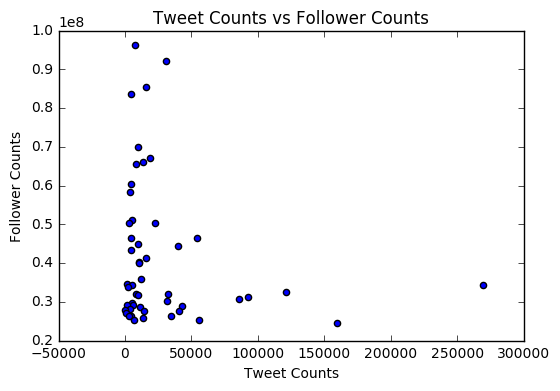

In [30]:
plt.scatter(tweet_counts, follower_counts)
plt.xlabel("Tweet Counts")
plt.ylabel("Follower Counts")
plt.title("Tweet Counts vs Follower Counts")
plt.show()

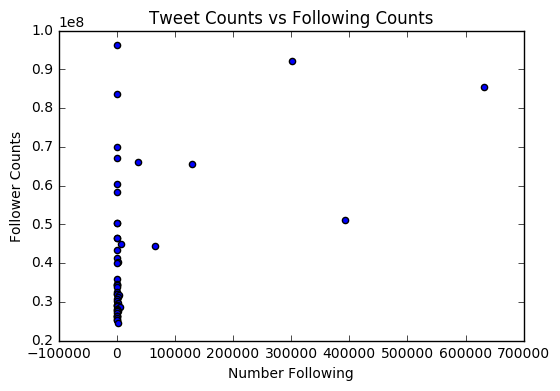

In [45]:
plt.scatter(following_counts, follower_counts)
plt.xlabel("Number Following")
plt.ylabel("Follower Counts")
plt.title("Tweet Counts vs Following Counts")
plt.show()

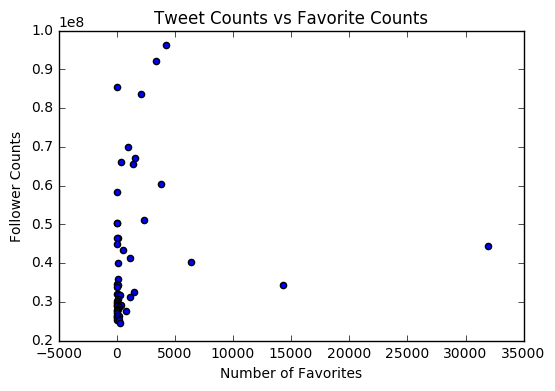

In [46]:
plt.scatter(favorite_counts, follower_counts)
plt.xlabel("Number of Favorites")
plt.ylabel("Follower Counts")
plt.title("Tweet Counts vs Favorite Counts")
plt.show()